In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from IPython.display import IFrame
from mpl_toolkits.mplot3d import Axes3D

In [124]:
def cartesian_product(X, Y):
    return np.dstack(np.meshgrid(X, Y)).reshape(-1, 2)

def flatten(X):
    return np.asarray(X).reshape(-1)

def sigmoid(X):  
    return np.exp(-np.logaddexp(0, -X))

def relu(X):
    x = X.copy()
    x[x < 0] = 0
    return x

def identity(X):
    return X

def normalize(X):
    X_range = X.max() - X.min()
    if X_range == 0:
        return np.repeat(0, X.size)
    return (X + abs(X.min())) / X_range

func_map = {
    "linear": identity,
    "tanh": np.tanh,
    "sigmoid": sigmoid,
    "relu": relu
}

# Intro to Neural Networks

[github.com/ivan-krukov/tensorflow-tut](https://github.com/ivan-krukov/tensorflow-tut)

# Image-to-Image translation

https://junyanz.github.io/CycleGAN/

![IMT](https://junyanz.github.io/CycleGAN/images/teaser.jpg)

# Resources

* [Neural Netowrks and Deep Learning, by Michael Nielsen](http://neuralnetworksanddeeplearning.com/)
* [Neural Netowrks without a Ph. D.](https://cloud.google.com/blog/big-data/2017/01/learn-tensorflow-and-deep-learning-without-a-phd)

# Session Plan

* Neuron internals
    * Lines
    * Planes
    * Combinations of Planes
    * Functions
    * Combinations of Functions
* Interactive example
* Hand-written digit recognition

# Main idea

* Combine inputs to get desired oputput
* Want to find function mapping inputs to outputs
* What functions do we use?

# Classification

_Numeric_ input, _Label_ output
$$f: [-\infty, \infty]\rightarrow {0, 1}$$

# Lines

* One axis input $x$
* One axis output $y$
* Weight $w$, slope
* Bias $b$, intercept

$$y = x \times w + b$$

In [125]:
def line(W = 1, b = 0, transform = "linear"):
    X = np.arange(-10, 10, 0.1)
    f = func_map[transform]
    Y = f((X * W) + b)
    return (X, Y)

def plot_line(X, Y):
    plt.scatter(X, Y, c = plt.cm.PuOr(Y, alpha = 0.2), edgecolor = 'none')
    plt.show()

def plot_line_i(W = 1, b = 0, transform = "linear"):
    X, Y = line(W, b, transform)
    plot_line(X, Y)


In [126]:
interact(
    plot_line_i,
    W = (-2, 2, 0.1), 
    b = (-10, 10, 1),
    transform = func_map.keys())

<function __main__.plot_line_i>

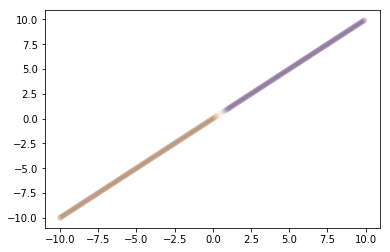

W = 1, b = 0


In [127]:
plot_line_i(1, 0)
print("W = 1, b = 0")

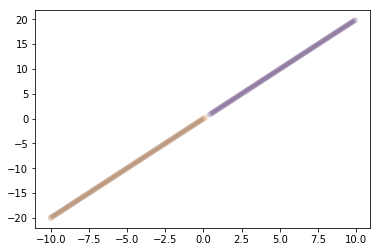

W = 2, b = 0


In [128]:
plot_line_i(2, 0)
print("W = 2, b = 0")

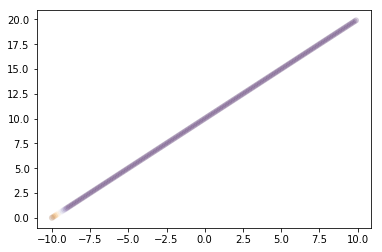

W = 1, b = 10


In [129]:
plot_line_i(1, 10)
print("W = 1, b = 10")

# Planes


* Two axis input $x$, $y$
* One axis output $z$
* Weight $W$, slope
* Bias $b$, intercept

$$Z = \vec{XY} \times \vec{W} + b$$


$$Z = \begin{bmatrix}
x_1 & y_1 \\
\vdots & \vdots \\
x_m & y_m \\
\end{bmatrix} \times
\begin{bmatrix}
W_x \\
W_y \\
\end{bmatrix} + b
$$

In [130]:

def surface(W1 = 1, W2 = 1, b = 0, transform = "linear"):
    X = np.arange(-10, 10, 1)
    Y = np.arange(-10, 10, 1)
    XY = cartesian_product(X, Y)
    W = np.matrix([[W1], [W2]])
    f = func_map[transform]
    Z = f((XY * W) + b)

    return(XY[:,0], XY[:,1], flatten(Z))

In [131]:
def plot_surface(X, Y, Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap="PuOr")
    plt.show()
    
def plot_surface_i(W1 = 1, W2 = 1, b = 0, transform = "linear"):
    X, Y, Z = surface(W1, W2, b, transform)
    plot_surface(X, Y, Z)

In [132]:
def combine_surfaces(Z1, Z2, W1, W2, b, transform):
    Z = np.column_stack((Z1, Z2))
    W = np.matrix([[W1], [W2]])
    f = func_map[transform]
    C = f((Z * W) + b)
    return flatten(C)

In [133]:
interact(
    plot_surface_i,
    w1 = (-2, 2, 0.1),
    w2 = (-2, 2, 0.1),
    b = (-10, 10, 1),
    transform = func_map.keys())

<function __main__.plot_surface_i>

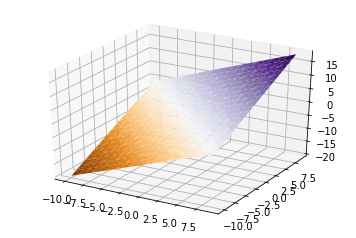

W1 = 1, W2 = 1, b = 0


In [134]:
plot_surface_i(1, 1, 0)
print("W1 = 1, W2 = 1, b = 0")

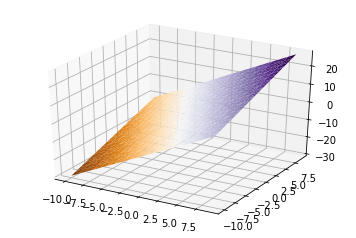

W1 = 2, W2 = 1, b = 0


In [135]:
plot_surface_i(2, 1, 0)
print("W1 = 2, W2 = 1, b = 0")

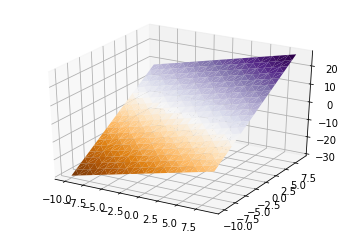

W1 = 1, W2 = 2, b = 0


In [136]:
plot_surface_i(1, 2, 0)
print("W1 = 1, W2 = 2, b = 0")

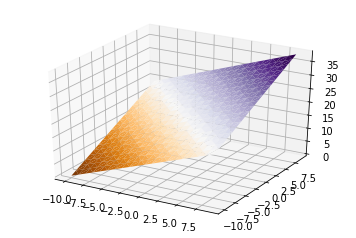

W1 = 1, W2 = 1, b = 20


In [137]:
plot_surface_i(1, 1, 20)
print("W1 = 1, W2 = 1, b = 20")

# Linear neuron
![linear_neuron](linear_neuron.png)

# Combining Neurons
![two_neurons](two_neurons.png)

In [138]:
def plot_combined_i(W11 = 1, W12 = 1, b1 = 0, W21 = -1, W22 = 1, b2 = 0, W31 = 1, W32 = 1, b3 = 0, transform = "linear"):
    X, Y, Z1 = surface(W11, W12, b1, transform)
    X, Y, Z2 = surface(W21, W22, b2, transform)
    Z = combine_surfaces(Z1, Z2, W31, W32, b3, transform)
    plot_surface(X, Y, Z)

In [139]:
interact(
    plot_combined_i,
    W11 = (-2, 2, 0.1),
    W12 = (-2, 2, 0.1),
    b1 = (-10, 10, 1),
    W21 = (-2, 2, 0.1),
    W22 = (-2, 2, 0.1),
    b2 = (-10, 10, 1),
    W31 = (-2, 2, 0.1),
    W32 = (-2, 2, 0.1),
    b3 = (-10, 10, 1),
    transform = func_map.keys())

<function __main__.plot_combined_i>

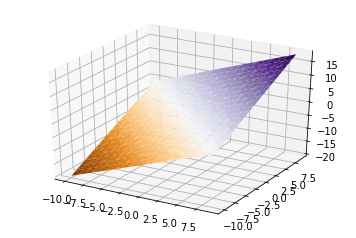

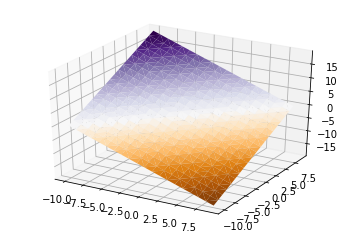

In [140]:
plot_surface_i(1, 1, 0)
plot_surface_i(-1, 1, 0)

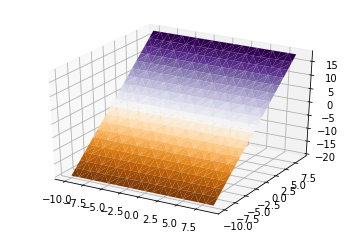

In [141]:
plot_combined_i(
    1, 1, 0,
    -1, 1, 0,
    1, 1, 0)

# Functional Neuron
![functional_neuron](functional_neuron.png)

In [142]:
interact(
    plot_line_i,
    W = (-2, 2, 0.1), 
    b = (-10, 10, 1),
    transform = func_map.keys())

<function __main__.plot_line_i>

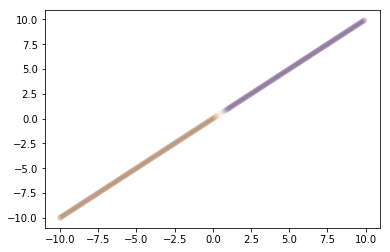

Linear


In [143]:
plot_line_i(1, 0, "linear")
print("Linear")

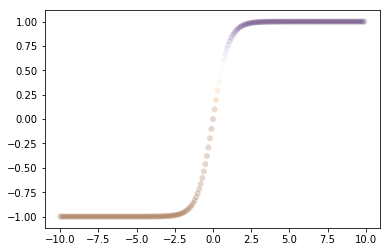

Hyperbolic Tangent


In [144]:
plot_line_i(1, 0, "tanh")
print("Hyperbolic Tangent")

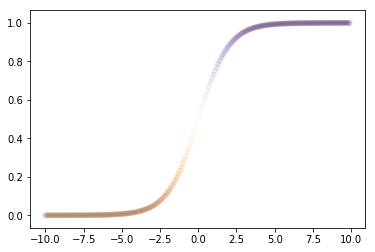

Sigmoid


In [145]:
plot_line_i(1, 0, "sigmoid")
print("Sigmoid")

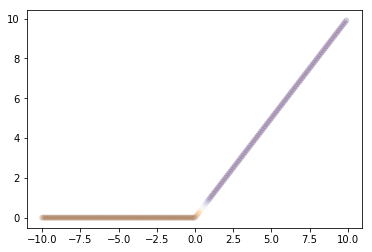

Rectified Linear Unit


In [146]:
plot_line_i(1, 0, "relu")
print("Rectified Linear Unit")

In [147]:
interact(
    plot_surface_i,
    w1 = (-2, 2, 0.1),
    w2 = (-2, 2, 0.1),
    b = (-10, 10, 1),
    transform = func_map.keys())

<function __main__.plot_surface_i>

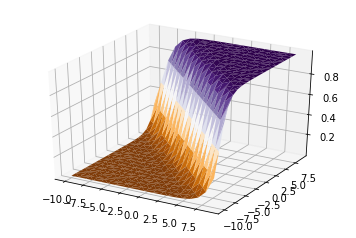

Sigmoid, W1 = 1, W2 = 1, b = 0


In [148]:
plot_surface_i(1, 1, 0, "sigmoid")
print("Sigmoid, W1 = 1, W2 = 1, b = 0")

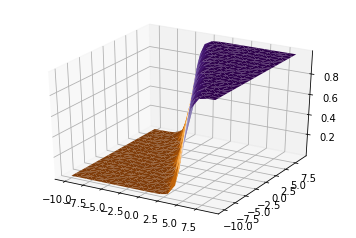

Sigmoid, W1 = 2, W2 = 1, b = 0


In [149]:
plot_surface_i(2, 1, 0, "sigmoid")
print("Sigmoid, W1 = 2, W2 = 1, b = 0")

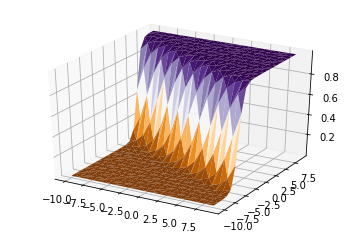

Sigmoid, W1 = 1, W2 = 2, b = 0


In [150]:
plot_surface_i(1, 2, 0, "sigmoid")
print("Sigmoid, W1 = 1, W2 = 2, b = 0")

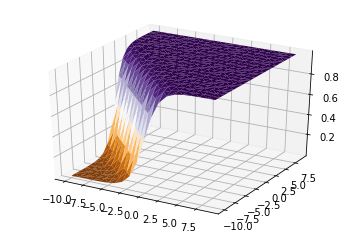

Sigmoid, W1 = 1, W2 = 1, b = 10


In [151]:
plot_surface_i(1, 1, 10, "sigmoid")
print("Sigmoid, W1 = 1, W2 = 1, b = 10")

# Combining neurons

![simple_weights](simple_weight.png)

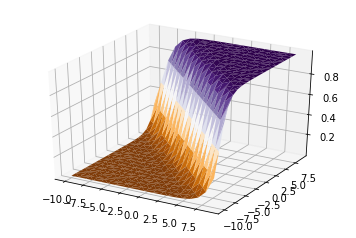

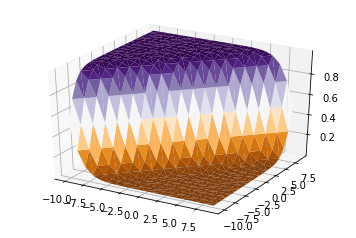

In [152]:
plot_surface_i(1, 1, 0, "sigmoid")
plot_surface_i(-1, 1, 0, "sigmoid")

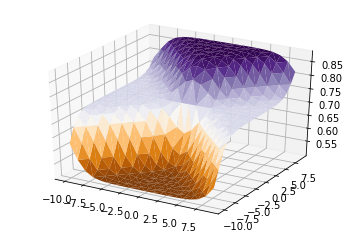

In [153]:
plot_combined_i(
    1, 1, 0,
    -1, 1, 0,
    1, 1, 0,
    "sigmoid")

In [154]:
interact(
    plot_combined_i,
    W11 = (-2, 2, 0.1),
    W12 = (-2, 2, 0.1),
    b1 = (-10, 10, 1),
    W21 = (-2, 2, 0.1),
    W22 = (-2, 2, 0.1),
    b2 = (-10, 10, 1),
    W31 = (-2, 2, 0.1),
    W32 = (-2, 2, 0.1),
    b3 = (-10, 10, 1),
    transform = func_map.keys())

<function __main__.plot_combined_i>

http://playground.tensorflow.org/